Mean squared error: 309.07
R² score: 0.09


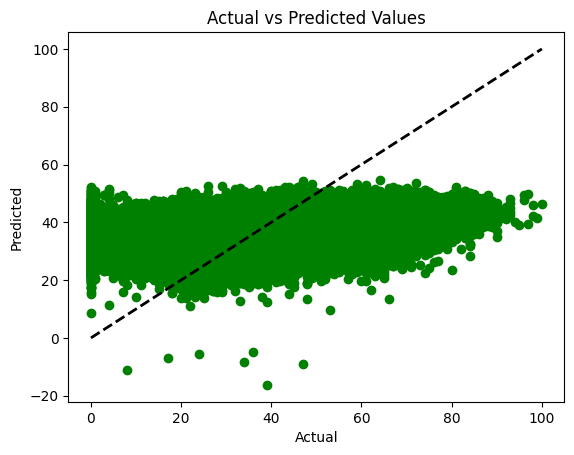

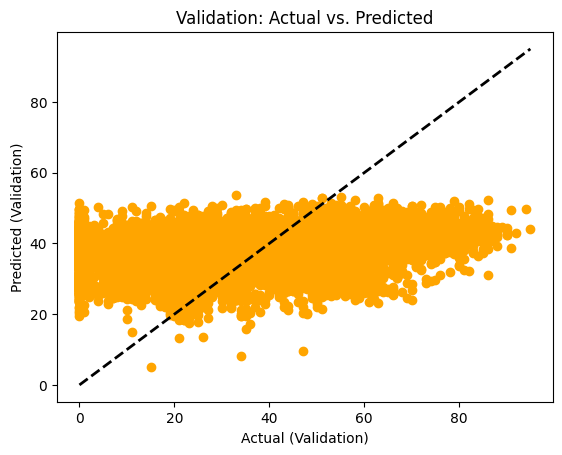

Validation MSE: 310.97080797777676
Validation R² score: 0.08145518918680783


In [6]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Setting up Data Frames and taking random samples
full_df = pd.read_csv('../data_processing/updated_dataset.csv')
full_df = full_df.drop(columns=['Unnamed: 0'])
train_df = full_df.sample(frac=0.8, random_state=42)
validation_df = full_df.drop(train_df.index)

def preprocess_data(df, target_column='popularity'):
        # 1. Separate features and target
    y = df[target_column]
    X = df.drop(target_column, axis=1)

    # 2. Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # 3. Encode all categorical columns with LabelEncoder
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col].astype(str))  # Convert to string first

    return X, y

X, y = preprocess_data(train_df)

# Fit linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

#Basic Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("R² score: %.2f" % r2_score(y, y_pred))

#Plotting
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

X_val, y_val = preprocess_data(validation_df)

#Predictions
y_val_pred = regr.predict(X_val)

#Plotting Comparisons
plt.scatter(y_val, y_val_pred, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual (Validation)')
plt.ylabel('Predicted (Validation)')
plt.title('Validation: Actual vs. Predicted')
plt.show()

#Evaluation on validation set
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R² score:", r2_score(y_val, y_val_pred))



Validation MSE: 173.32
Validation R² Score: 0.49


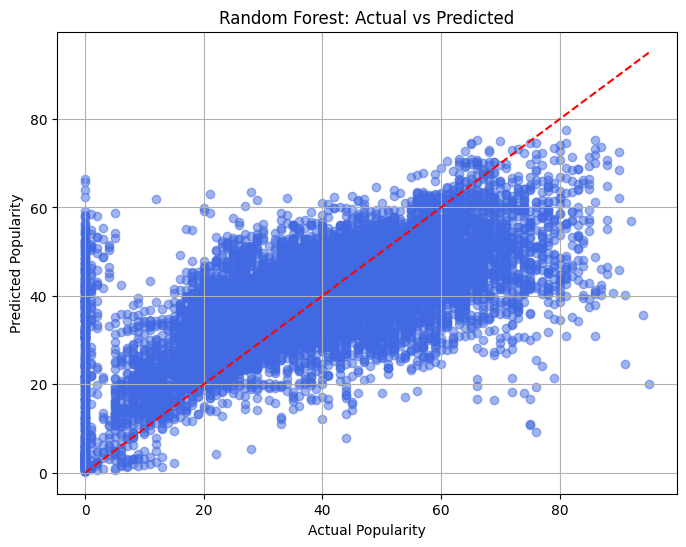

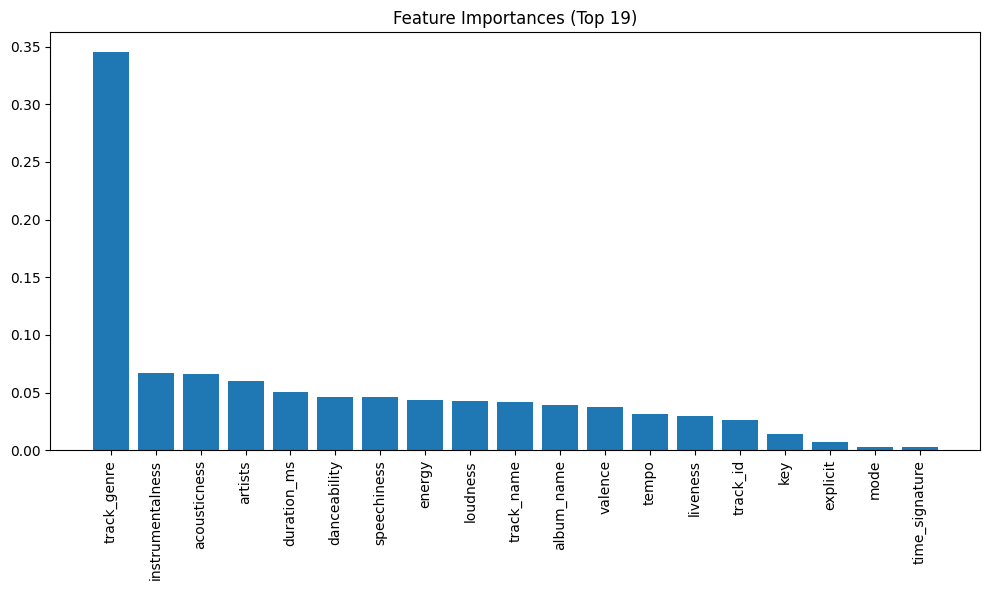

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
RFRmodel = RandomForestRegressor(n_estimators=100, random_state=42)
RFRmodel.fit(X, y)

# Predict and evaluate
y_pred = RFRmodel.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation R² Score: {r2:.2f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='royalblue')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest: Actual vs Predicted')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.grid(True)
plt.show()

#Plotting Feature importances
importances = RFRmodel.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]

# Plot top 20 important features
n_features = len(importances)

plt.figure(figsize=(10, 6))
plt.title(f"Feature Importances (Top {min(20, n_features)})")
plt.bar(range(min(20, n_features)), importances[indices[:20]], align="center")
plt.xticks(range(min(20, n_features)), feature_names[indices[:20]], rotation=90)
plt.tight_layout()
plt.show()
